# Importing Necessary Libraries 
<br />
<br />
<br />
<br />


In this first part I will be preparing the data with cleaning it, look out for possible columns to drop, deal with missing data and outlier. 

In [482]:
import pandas as pd 
import numpy as np
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns



In [483]:
df = pd.read_csv(r'/Users/alix/Downloads/Climbing_raw7.csv')
df.head()

,Timestamp,Email Address,Score,Age,Gender,Weight,Height,APE Index,Level,Indoor or outdoor,Experience,Training frequency,Gym,Climbing shoes,Competition,Rank
0,9/14/2022 18:12:35,alexis128@gmail.com,NaN,40,Male,78,181,NaN,5B,outdoor,1.0,1,vary,Decathlon,yes,1
1,9/14/2022 18:20:00,afalabdali90@gmail.com,NaN,32,Male,65,180,10,5B,indoor,6.0,3,vary,Five ten,yes,6
2,9/14/2022 18:23:52,osileo82@gmail.com,NaN,40,male,105,186,NaN,5B,indoor,1.0,1,vary,Decathlon,no,never participated
3,9/14/2022 19:16:30,carolyne.ngft@hotmail.fr,NaN,32,Male,46,155,NaN,6B,indoor,1.0,1,same,Simond,no,NaN
4,9/14/2022 19:19:06,heloir.alois@live.fr,NaN,22,Male,63,178,NaN,6B,outdoor,1.0,4,same,Decathlon,yes,89/120


In [487]:
df ["Gender"].value_counts()

Masculin    37
male        31
Feminin     24
Female      11
Male         7
Name: Gender, dtype: int64

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           110 non-null    object 
 1   Email Address       110 non-null    object 
 2   Score               0 non-null      float64
 3   Age                 110 non-null    int64  
 4   Gender              110 non-null    object 
 5   Weight              110 non-null    int64  
 6   Height              110 non-null    int64  
 7   APE Index           53 non-null     object 
 8   Level               110 non-null    object 
 9   Indoor or outdoor   110 non-null    object 
 10  Experience          110 non-null    float64
 11  Training frequency  110 non-null    int64  
 12  Gym                 110 non-null    object 
 13  Climbing shoes      110 non-null    object 
 14  Competition         110 non-null    object 
 15  Rank                30 non-null     object 
dtypes: float

In [440]:
# let's first visualize the columns 
for i,c in enumerate(df.columns):
    print(i,c)

0 Timestamp
1 Email Address
2 Score
3 Age
4 Gender
5 Weight
6 Height
7 APE Index
8 Level
9 Indoor or outdoor
10 Experience
11 Training frequency
12 Gym
13 Climbing shoes
14 Competition
15 Rank


# Data Preparation

<br />
<br />
<br />
<br />


### Dealing Missing Values and Dropping Unnecessary Columns 

In [441]:
df.isnull().sum()

Timestamp               0
Email Address           0
Score                 110
Age                     0
Gender                  0
Weight                  0
Height                  0
APE Index              57
Level                   0
Indoor or outdoor       0
Experience              0
Training frequency      0
Gym                     0
Climbing shoes          0
Competition             0
Rank                   80
dtype: int64

Bellow I will be adding the BMI score that will be calculated from the weight and height provided by each participant, I prefered to do it on python instead of making the participants do it. 
<br />
<br />

In [442]:
df['BMI'] = df['Weight'] / df['Height'].div(100).pow(2)

In [443]:
df["Start_Age"]=df["Age"]-df["Experience"]

I have decided to drop the column Score because it was completely empty, it only came with the GoogleForm document. The email column was also irrelevent. The rank and Ape Index were quite relevent but unfortunately useless because they have both over 50%  NaN values. 
<br />
<br />

In [444]:
df = df.drop(["Timestamp", "Score", "APE Index", "Email Address", "Rank"], axis = 1)


## Language consistency (Translation of the French Survey)

 Because my survey was both in French and English, I will have to translate a few of the multiple choice words, such as Feminin to Female, and Masculin to Male so that I am able to work with coherent data and encode it afterwards. 
<br />
<br />

In [445]:
df['Gender'].unique()

array(['Male', 'male', 'Female', 'Feminin', 'Masculin'], dtype=object)

In [446]:
df['Gender'] = df['Gender'].replace(['male','Feminin'],['Male','Female'])

In [447]:
df['Gender'] = df['Gender'].replace(['Masculin'],'Male')


In [448]:
df["Gym"].value_counts()

varier    45
vary      28
same      20
même      17
Name: Gym, dtype: int64

In [449]:
df["Gym"] = df["Gym"].replace(["varier", "même"], ["vary", "same" ])

In [450]:
df["Competition"].value_counts()

Non    42
no     34
yes    14
Oui    11
No      9
Name: Competition, dtype: int64

In [451]:
df["Competition"] = df["Competition"].replace(["Oui"], ["Yes"])

In [452]:
df["Competition"] = df["Competition"].replace(["yes"], ["Yes"])

In [453]:
df["Competition"] = df["Competition"].replace(["Non"], ["No"])

In [454]:
df["Competition"] = df["Competition"].replace(["no"], ["No"])

In [455]:
df["Competition"].value_counts()

No     85
Yes    25
Name: Competition, dtype: int64

In [456]:
df['Climbing shoes'] = df['Climbing shoes'].str.lower()

In [457]:
df['Climbing shoes'] = df['Climbing shoes'].replace(['scarpa '],['scarpa'])

In [458]:
df['Climbing shoes'].value_counts()

scarpa                                                32
la sportiva                                           22
decathlon                                             17
simond                                                10
tenaya                                                 4
scarpa and la sportiva                                 3
boldrini                                               2
boreal                                                 2
rental shoes                                           2
vapor                                                  2
millet                                                 1
xsgrip                                                 1
barrabes                                               1
mad rock                                               1
red chili                                              1
eb                                                     1
edmond                                                 1
five ten                       

In [459]:
for i,c in enumerate(df.columns):
    print(i,c)

0 Age
1 Gender
2 Weight
3 Height
4 Level
5 Indoor or outdoor
6 Experience
7 Training frequency
8 Gym
9 Climbing shoes
10 Competition
11 BMI
12 Start_Age


# Dealing with the categorical data 

In [460]:
df

,Age,Gender,Weight,Height,Level,Indoor or outdoor,Experience,Training frequency,Gym,Climbing shoes,Competition,BMI,Start_Age
0,40,Male,78,181,5B,outdoor,1.0,1,vary,decathlon,Yes,23.808797,39.0
1,32,Male,65,180,5B,indoor,6.0,3,vary,five ten,Yes,20.061728,26.0
2,40,Male,105,186,5B,indoor,1.0,1,vary,decathlon,No,30.350330,39.0
3,32,Male,46,155,6B,indoor,1.0,1,same,simond,No,19.146722,31.0
4,22,Male,63,178,6B,outdoor,1.0,4,same,decathlon,Yes,19.883853,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,32,Male,70,172,6A,indoor,3.0,2,vary,decathlon,No,23.661439,29.0
106,33,Male,64,178,5b,indoor,7.0,3,same,decathlon,Yes,20.199470,26.0
107,36,Female,62,169,5b,indoor,1.0,1,vary,decathlon,No,21.707923,35.0
108,23,Female,56,159,7A,outdoor,2.0,4,vary,scarpa and la sportiva,Yes,22.151023,21.0


In [461]:
df['Climbing shoes'].value_counts()

scarpa                                                32
la sportiva                                           22
decathlon                                             17
simond                                                10
tenaya                                                 4
scarpa and la sportiva                                 3
boldrini                                               2
boreal                                                 2
rental shoes                                           2
vapor                                                  2
millet                                                 1
xsgrip                                                 1
barrabes                                               1
mad rock                                               1
red chili                                              1
eb                                                     1
edmond                                                 1
five ten                       

### The following is a Wordmap that shows the most worn climbing shoes amongst the the reponders which are clearly Scarpa and La Sportiva

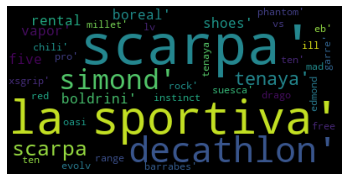

In [462]:

text = df['Climbing shoes'].values 
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [463]:
for i,c in enumerate(df.columns):
    print(i,c)

0 Age
1 Gender
2 Weight
3 Height
4 Level
5 Indoor or outdoor
6 Experience
7 Training frequency
8 Gym
9 Climbing shoes
10 Competition
11 BMI
12 Start_Age



# Dealing with the categorical data 
### Encoding 
<br />
<br />
<br />
<br />

In [464]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
print (LabelEncoder)

<class 'sklearn.preprocessing._label.LabelEncoder'>


In [465]:
df["Gym" ] = label_encoder.fit_transform(df["Gym"])
df["Competition" ] = label_encoder.fit_transform(df["Competition"])
df["Gender" ] = label_encoder.fit_transform(df["Gender"])
df["Indoor or outdoor" ] = label_encoder.fit_transform(df["Indoor or outdoor"])
df

,Age,Gender,Weight,Height,Level,Indoor or outdoor,Experience,Training frequency,Gym,Climbing shoes,Competition,BMI,Start_Age
0,40,1,78,181,5B,1,1.0,1,1,decathlon,1,23.808797,39.0
1,32,1,65,180,5B,0,6.0,3,1,five ten,1,20.061728,26.0
2,40,1,105,186,5B,0,1.0,1,1,decathlon,0,30.350330,39.0
3,32,1,46,155,6B,0,1.0,1,0,simond,0,19.146722,31.0
4,22,1,63,178,6B,1,1.0,4,0,decathlon,1,19.883853,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,32,1,70,172,6A,0,3.0,2,1,decathlon,0,23.661439,29.0
106,33,1,64,178,5b,0,7.0,3,0,decathlon,1,20.199470,26.0
107,36,0,62,169,5b,0,1.0,1,1,decathlon,0,21.707923,35.0
108,23,0,56,159,7A,1,2.0,4,1,scarpa and la sportiva,1,22.151023,21.0


In [466]:
# Ordinal Encoder for the Level Column that is going to be my Target Variable

In [467]:
from sklearn.preprocessing import OrdinalEncoder

In [468]:
df["Level"].unique()

array(['5B', '6B', '7A', '6A', '5C', '6C', '5b', '7C', '7B'], dtype=object)

In [469]:
enc= OrdinalEncoder()

In [470]:
level= ['5B', '6B', '7A', '6A', '5C', '6C', '5b', '7C', '7B']

In [471]:
enc= OrdinalEncoder(categories= [level])

In [472]:
enc.fit_transform(df[["Level"]])

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],
       [1.],
       [4.],
       [3.],
       [5.],
       [6.],
       [6.],
       [1.],
       [5.],
       [7.],
       [4.],
       [5.],
       [5.],
       [2.],
       [5.],
       [7.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [7.],
       [5.],
       [5.],
       [5.],
       [8.],
       [7.],
       [6.],
       [8.],
       [5.],
       [2.],
       [2.],
       [8.],
       [8.],
       [5.],
       [4.],
       [2.],
       [2.],
       [4.],
       [1.],
       [4.],
       [1.],
       [3.],
       [6.],
       [5.],
       [2.],
       [4.],
       [5.],
       [4.],
       [8.],
       [5.],
       [1.],
       [7.],
       [2.],
       [5.],
       [2.],
       [4.],
       [2.],
       [6.],
       [5.],
       [3.],
       [2.],
       [3.],
       [3.],
       [4.],
       [6.],
       [7.],
       [3.],

In [473]:
df["Level"] = enc.fit_transform(df[["Level"]])

In [474]:
df["Level"] .value_counts()

2.0    20
1.0    19
5.0    17
3.0    16
4.0    12
6.0    10
7.0     7
8.0     6
0.0     3
Name: Level, dtype: int64

In [475]:
#df.to_csv(r'/Users/alix/Desktop/encoded_data3.csv')

In [476]:
df.isnull().sum()

Age                   0
Gender                0
Weight                0
Height                0
Level                 0
Indoor or outdoor     0
Experience            0
Training frequency    0
Gym                   0
Climbing shoes        0
Competition           0
BMI                   0
Start_Age             0
dtype: int64

In [477]:
one_hot = pd.get_dummies(df['Climbing shoes'])
# Drop column B as it is now encoded
df = df.drop('Climbing shoes',axis = 1)
# Join the encoded df
df=df.join(one_hot)
df

,Age,Gender,Weight,Height,Level,Indoor or outdoor,Experience,Training frequency,Gym,Competition,...,rental shoes,scarpa,scarpa and la sportiva,"scarpa drago lv , scarpa instinct vs, tenaya oasi",simond,so ill free range pro,suesca,tenaya,vapor,xsgrip
0,40,1,78,181,0.0,1,1.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,32,1,65,180,0.0,0,6.0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,40,1,105,186,0.0,0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,32,1,46,155,1.0,0,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,22,1,63,178,1.0,1,1.0,4,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,32,1,70,172,3.0,0,3.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
106,33,1,64,178,6.0,0,7.0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
107,36,0,62,169,6.0,0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
108,23,0,56,159,2.0,1,2.0,4,1,1,...,0,0,1,0,0,0,0,0,0,0


In [479]:
df.to_csv(r'/Users/alix/Desktop/encoded_data4.csv')